In [1]:
using Revise
using Flux, NCA, Plots, ProgressMeter, FileIO
using Images

In [2]:
W = 50
H = 50
C = 16
P = 1000

1000

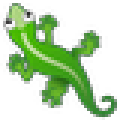

In [39]:
# target = zeros(Float32, (W, H, C))
# target[5:7, 5:7, 1:2] .= 1.0
function load_emoji(index, path="templates/emoji.png")
    img = FileIO.load(path)
    img = channelview(img)
    img = img[:, :, index * 40 + 1:(index + 1) * 40]

    permutedims(img, [3, 2, 1])
end
target = load_emoji(0)

pool = NCA.Pool((W, H, C, P), target, 1:2)

Images.colorview(RGBA, permutedims(target, [3, 2, 1]))

In [23]:
model = NCA.NCAModel(C, hidden_size=128)
optim = Flux.setup(Flux.Adam(0.002), model)
# Flux.Optimisers.freeze!(optim.conv)

(layers = (layers = ((σ = (), weight = Leaf(Adam{Float64}(0.002, (0.9, 0.999), 1.0e-8), ([0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; … ;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; … ;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam{Float64}(0.002, (0.9, 0.999), 1.0e-8), (Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (0.9, 0.999))), stride = ((), ()), pad = ((), (), (), ()), dilation = ((), ()), groups = ()), (σ =

In [24]:
n_samples = 8
seed = NCA.make_seed((W, H, C))
losses = []

for epoch in 1:1_000
    loss = NCA.one_epoch(model, optim, pool, n_samples, seed)
    push!(losses, loss)
end

0.079598695
0.94680536


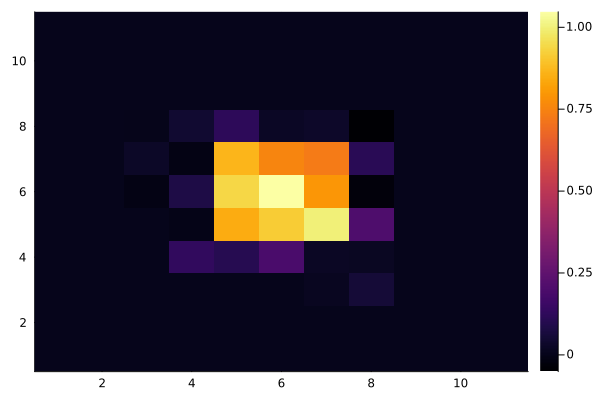

In [31]:
next = model(repeat(NCA.make_seed((W, H, C)), outer=[1,1,1,1]), steps=15) 

# println(Flux.mse(next[:, :, 1, 1], target))
println(next[6,4,1,1])
println(next[6,6,2,1])
heatmap(next[:,:,1,1])
# heatmap(NCA.alive_mask(next, .1)[:,:,1,1])

In [1]:
heatmap(pool.states[:,:,1,1])

UndefVarError: UndefVarError: pool not defined

In [ ]:
# next = ifelse.(NCA.alive_mask(next, 0.1), next, 0.0f32)

maxpool = MaxPool((3, 3), pad=SamePad(), stride=1)
# println(maxpool(selectdim(next, 3, 2:2))[6,1,1,1])
println(maxpool(selectdim(next, 3, 2:2)[6:6, 1:1, 1:1, 1:1]))
println(size(maxpool(selectdim(next, 3, 2:2))))

heatmap(next[:,:,1,1])

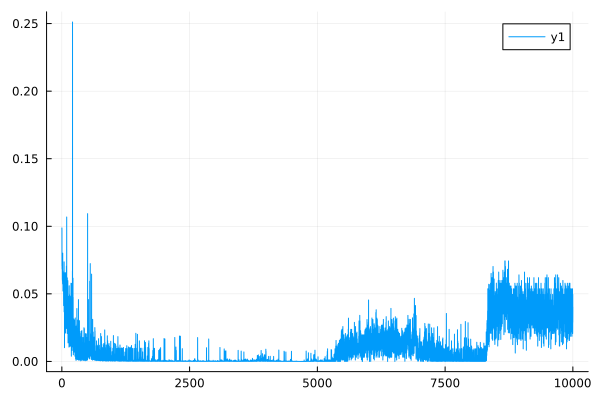

In [23]:
plot(losses)